In [1]:
#student record prediction

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stud=pd.read_csv(r"C:\Student_Prediction.csv")
stud.head()

,Roll Number,Student Id,Surname,Score,Country,Gender,Age,Year,Credit,NumOf Holiday,Id Card,Active Student,Estimated Credit,Computer Student
0,1,15677020,Selezneva,570,France,Female,32,8,0.00,1,0,1,3430.38,1
1,2,15727688,Chizuoke,555,Spain,Male,12,4,151958.19,2,1,1,160450.21,0
2,3,15715941,Lueck,692,France,Male,36,5,0.00,2,1,1,1485.27,0
3,4,15714485,Udinese,774,France,Male,21,5,118400.91,1,1,0,19720.08,1
4,5,15730059,Udobata,638,Spain,Male,22,9,0.00,2,1,1,41183.02,0


In [3]:
stud.shape

(10011, 14)

In [4]:
stud.isnull().sum()

Roll Number         0
Student Id          0
Surname             0
Score               0
Country             0
Gender              0
Age                 0
Year                0
Credit              0
NumOf Holiday       0
Id Card             0
Active Student      0
Estimated Credit    0
Computer Student    0
dtype: int64

In [5]:
#From the above, we will not require the first 2 attributes as the are specific to a student. 
#It is borderline with the surname as this would result to profiling so we exclude this as well.
stud=stud.drop(["Roll Number", "Student Id", "Surname"], axis = 1)

# Data-type Conversion

In [6]:
stud.dtypes

Score                 int64
Country              object
Gender               object
Age                   int64
Year                  int64
Credit              float64
NumOf Holiday         int64
Id Card               int64
Active Student        int64
Estimated Credit    float64
Computer Student      int64
dtype: object

In [7]:
stud.Country=le.fit_transform(stud.Country)
stud.Gender=le.fit_transform(stud.Gender)

In [8]:
stud.dtypes


Score                 int64
Country               int32
Gender                int32
Age                   int64
Year                  int64
Credit              float64
NumOf Holiday         int64
Id Card               int64
Active Student        int64
Estimated Credit    float64
Computer Student      int64
dtype: object

In [9]:
stud.Country.value_counts()

0    5021
1    2511
2    2479
Name: Country, dtype: int64

# Model

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,precision_score,recall_score

In [11]:
stud.head(5)

,Score,Country,Gender,Age,Year,Credit,NumOf Holiday,Id Card,Active Student,Estimated Credit,Computer Student
0,570,0,0,32,8,0.00,1,0,1,3430.38,1
1,555,2,1,12,4,151958.19,2,1,1,160450.21,0
2,692,0,1,36,5,0.00,2,1,1,1485.27,0
3,774,0,1,21,5,118400.91,1,1,0,19720.08,1
4,638,2,1,22,9,0.00,2,1,1,41183.02,0


In [12]:
x=stud.iloc[:,0:-1]
y=stud.iloc[:,-1]

In [13]:
y.value_counts()


0    7971
1    2040
Name: Computer Student, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8008, 10), (2003, 10), (8008,), (2003,))

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [16]:
lg.fit(x_train,y_train)

LogisticRegression()

In [17]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
prob=lg.predict_proba(x_test)
#prob

In [19]:
df=pd.DataFrame(prob)
#df

In [20]:
from sklearn.metrics import confusion_matrix
lg_cf=confusion_matrix(y_test,lg_p)
lg_cf 

array([[1578,    0],
       [ 425,    0]], dtype=int64)

In [21]:
lg_ac=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_ac

78.78182725911134

In [22]:
a=f1_score(y_test,lg_p)
b=precision_score(y_test,lg_p)
c=recall_score(y_test,lg_p)

In [23]:
print(classification_report(y_test,lg_p))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1578
           1       0.00      0.00      0.00       425

    accuracy                           0.79      2003
   macro avg       0.39      0.50      0.44      2003
weighted avg       0.62      0.79      0.69      2003



# Decision Tree


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [25]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
dt_p=dt.predict(x_test)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
dt_cf=confusion_matrix(y_test,dt_p)
dt_cf

array([[1343,  235],
       [ 245,  180]], dtype=int64)

In [28]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

76.03594608087867

In [29]:
a1=f1_score(y_test,dt_p)
b1=precision_score(y_test,dt_p)
c1=recall_score(y_test,dt_p)

In [30]:
print(classification_report(y_test,dt_p))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1578
           1       0.43      0.42      0.43       425

    accuracy                           0.76      2003
   macro avg       0.64      0.64      0.64      2003
weighted avg       0.76      0.76      0.76      2003



# Random Forest


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [32]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
rf_p=rf.predict(x_test)

In [34]:
rf_cf=confusion_matrix(y_test,rf_p)
rf_cf

array([[1541,   37],
       [ 292,  133]], dtype=int64)

In [35]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

83.5746380429356

In [36]:
a2=f1_score(y_test,rf_p)
b2=precision_score(y_test,rf_p)
c2=recall_score(y_test,rf_p)

In [37]:
print(classification_report(y_test,rf_p))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1578
           1       0.78      0.31      0.45       425

    accuracy                           0.84      2003
   macro avg       0.81      0.64      0.68      2003
weighted avg       0.83      0.84      0.81      2003



# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
knn_p=knn.predict(x_test)

In [41]:
knn_cf=confusion_matrix(y_test,knn_p)
knn_cf

array([[1456,  122],
       [ 397,   28]], dtype=int64)

In [42]:
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac

74.08886669995007

In [43]:
a3=f1_score(y_test,knn_p)
b3=precision_score(y_test,knn_p)
c3=recall_score(y_test,knn_p)

In [44]:
print(classification_report(y_test,knn_p))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1578
           1       0.19      0.07      0.10       425

    accuracy                           0.74      2003
   macro avg       0.49      0.49      0.47      2003
weighted avg       0.66      0.74      0.69      2003



# XGB(XGBoost)

In [45]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [46]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
xgb_p=xgb.predict(x_test)

In [48]:
xgb_cf=confusion_matrix(y_test,xgb_p)
xgb_cf

array([[1512,   66],
       [ 282,  143]], dtype=int64)

In [49]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

82.62606090863704

In [50]:
a4=f1_score(y_test,xgb_p)
b4=precision_score(y_test,xgb_p)
c4=recall_score(y_test,xgb_p)

In [51]:
print(classification_report(y_test,xgb_p))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1578
           1       0.68      0.34      0.45       425

    accuracy                           0.83      2003
   macro avg       0.76      0.65      0.67      2003
weighted avg       0.81      0.83      0.80      2003



# SVM

In [52]:
from sklearn.svm import SVC
svm=SVC()

In [53]:
svm.fit(x_train,y_train)

SVC()

In [54]:
svm_p=svm.predict(x_test)

In [55]:
svm_cf=confusion_matrix(y_test,svm_p)
svm_cf

array([[1578,    0],
       [ 425,    0]], dtype=int64)

In [56]:
svm_ac=svm_cf.diagonal().sum()/svm_cf.sum()*100
svm_ac

78.78182725911134

In [57]:
a5=f1_score(y_test,svm_p)
b5=precision_score(y_test,svm_p)
c5=recall_score(y_test,svm_p)

In [58]:
print(classification_report(y_test,svm_p))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1578
           1       0.00      0.00      0.00       425

    accuracy                           0.79      2003
   macro avg       0.39      0.50      0.44      2003
weighted avg       0.62      0.79      0.69      2003



# Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [60]:
nb.fit(x_train,y_train)

MultinomialNB()

In [61]:
nb_p=nb.predict(x_test)
nb_p

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [62]:
nb_cf=confusion_matrix(y_test,nb_p)
nb_cf

array([[851, 727],
       [204, 221]], dtype=int64)

In [63]:
nb_ac=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_ac

53.51972041937094

In [64]:
a6=f1_score(y_test,nb_p)
b6=precision_score(y_test,nb_p)
c6=recall_score(y_test,nb_p)

In [65]:
print(classification_report(y_test,nb_p))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65      1578
           1       0.23      0.52      0.32       425

    accuracy                           0.54      2003
   macro avg       0.52      0.53      0.48      2003
weighted avg       0.68      0.54      0.58      2003



In [66]:
algo=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB","SVM","Naive Bayes"]
accuracy=[lg_ac,dt_ac,rf_ac,knn_ac,xgb_ac,svm_ac,nb_ac]
f1=[a,a1,a2,a3,a4,a5,a6]
precision=[b,b1,b2,b3,b4,b5,b6]
recall=[c,c1,c2,c3,c4,c5,c6]

In [67]:
model1=pd.DataFrame({"Algorithm":algo,"Accuracy":accuracy,"F1-score":f1,"Precision":precision,"Recall":recall})
model1

,Algorithm,Accuracy,F1-score,Precision,Recall
0,Logistic Regression,78.781827,0.000000,0.000000,0.000000
1,Decision Tree,76.035946,0.428571,0.433735,0.423529
2,Random Forest,83.574638,0.447059,0.782353,0.312941
3,KNN,74.088867,0.097391,0.186667,0.065882
4,XGB,82.626061,0.451104,0.684211,0.336471
5,SVM,78.781827,0.000000,0.000000,0.000000
6,Naive Bayes,53.519720,0.321923,0.233122,0.520000


# Class Imbalanced

# Random Oversampling

In [68]:
stud["Computer Student"].value_counts()


0    7971
1    2040
Name: Computer Student, dtype: int64

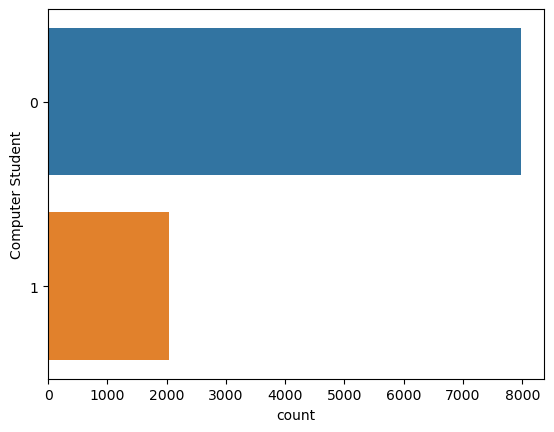

In [158]:
sns.countplot(data=stud,y="Computer Student")
plt.show()

In [69]:
c_0,c_1=stud["Computer Student"].value_counts()
c_0,c_1

(7971, 2040)

In [70]:
train_0=stud[stud["Computer Student"]==0]
train_1=stud[stud["Computer Student"]==1]
train_0.shape,train_1.shape

((7971, 11), (2040, 11))

In [71]:
class_1over=train_1.sample(c_0,replace=True)
class_1over.head()
class_1over.shape,train_0.shape

((7971, 11), (7971, 11))

In [72]:
class1_0=pd.concat([class_1over,train_0],axis=0)
class1_0.shape

(15942, 11)

In [73]:
class1_0["Computer Student"].value_counts()

1    7971
0    7971
Name: Computer Student, dtype: int64

In [74]:
class1_0.head(2)

,Score,Country,Gender,Age,Year,Credit,NumOf Holiday,Id Card,Active Student,Estimated Credit,Computer Student
2594,537,1,0,22,6,0.00,1,1,0,16259.64,1
7832,573,2,1,46,3,65269.23,1,0,1,189988.65,1


In [75]:
x1=class1_0.iloc[:,0:-1]
y1=class1_0.iloc[:,-1]

In [76]:
x_tr,x_te,y_tr,y_te=train_test_split(x1,y1,test_size=0.2,random_state=100)
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((12753, 10), (3189, 10), (12753,), (3189,))

# Correlation

In [77]:
stud_cor=stud.corr()
stud_cor

,Score,Country,Gender,Age,Year,Credit,NumOf Holiday,Id Card,Active Student,Estimated Credit,Computer Student
Score,1.000000,0.008113,-0.002505,0.001693,0.000168,-0.007410,0.012811,-0.005450,0.025100,-0.005631,-0.027101
Country,0.008113,1.000000,0.005013,0.002069,0.003360,0.048205,0.004060,-0.008292,0.006934,-0.000940,0.035663
Gender,-0.002505,0.005013,1.000000,-0.003082,0.014731,0.012099,-0.021765,0.006500,0.022253,-0.006470,-0.106905
Age,0.001693,0.002069,-0.003082,1.000000,-0.011155,0.012969,0.001660,-0.009897,0.024991,-0.010041,0.087337
Year,0.000168,0.003360,0.014731,-0.011155,1.000000,-0.002279,0.013144,0.022550,-0.027776,0.010739,-0.014002
Credit,-0.007410,0.048205,0.012099,0.012969,-0.002279,1.000000,-0.213824,-0.005889,-0.003042,0.013795,0.089333
NumOf Holiday,0.012811,0.004060,-0.021765,0.001660,0.013144,-0.213824,1.000000,0.003111,0.009547,0.010905,-0.047947
Id Card,-0.005450,-0.008292,0.006500,-0.009897,0.022550,-0.005889,0.003111,1.000000,-0.012185,-0.004112,-0.007331
Active Student,0.025100,0.006934,0.022253,0.024991,-0.027776,-0.003042,0.009547,-0.012185,1.000000,-0.006110,-0.155934
Estimated Credit,-0.005631,-0.000940,-0.006470,-0.010041,0.010739,0.013795,0.010905,-0.004112,-0.006110,1.000000,0.010826


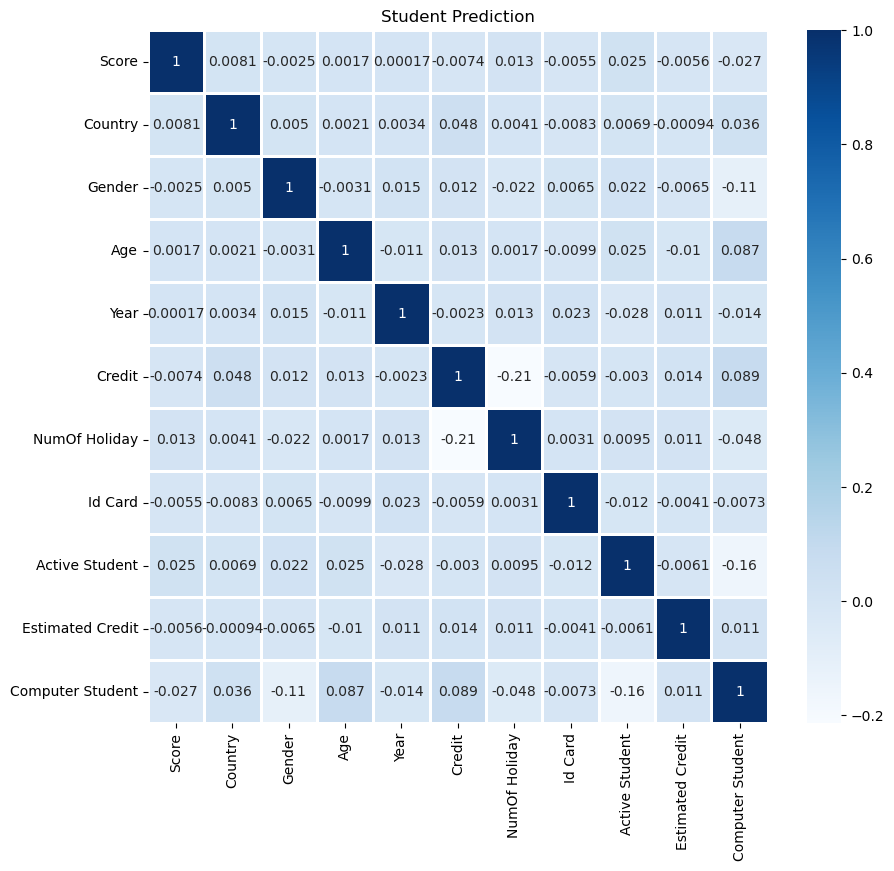

In [78]:
plt.figure(figsize=(10,9))
heatmap=sns.heatmap(stud_cor,linewidth=2,annot=True,cmap=plt.cm.Blues)
plt.title("Student Prediction")
plt.show()

# Outlier Treatment

In [79]:
x_tr.skew()

Score              -0.114297
Country             0.426015
Gender             -0.005803
Age                 0.945596
Year                0.037245
Credit             -0.227361
NumOf Holiday       1.284336
Id Card            -0.888483
Active Student      0.164772
Estimated Credit   -0.044061
dtype: float64

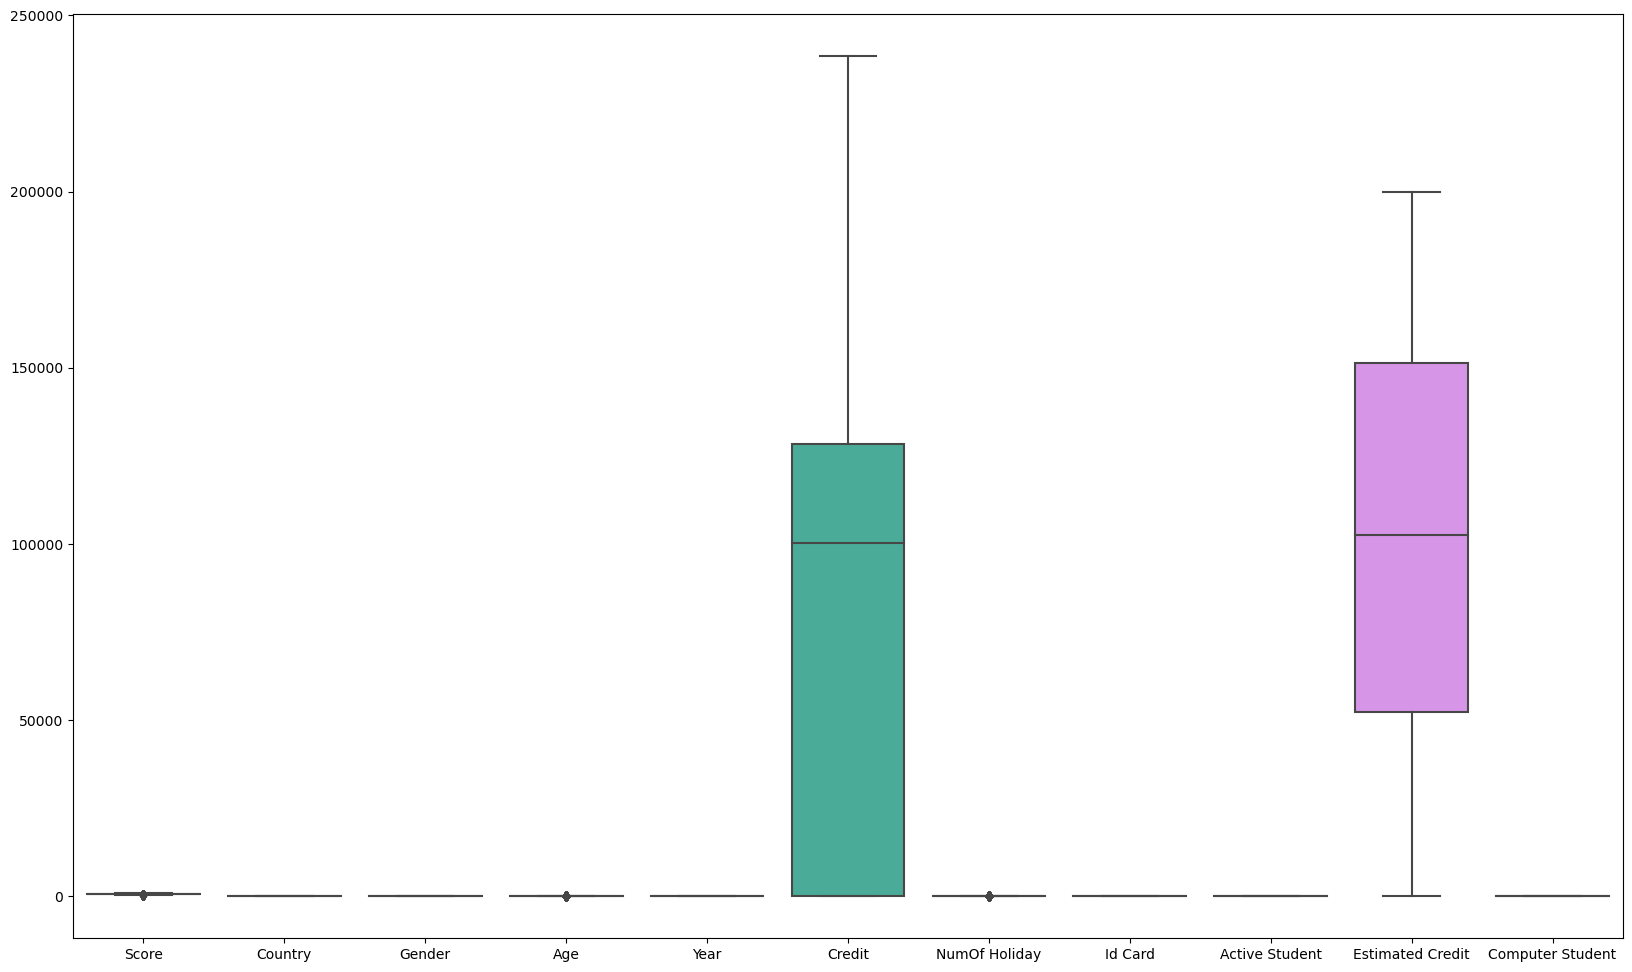

In [80]:
plt.figure(figsize=(20,12))
sns.boxplot(data=class1_0)
plt.show()

<Axes: ylabel='Score'>

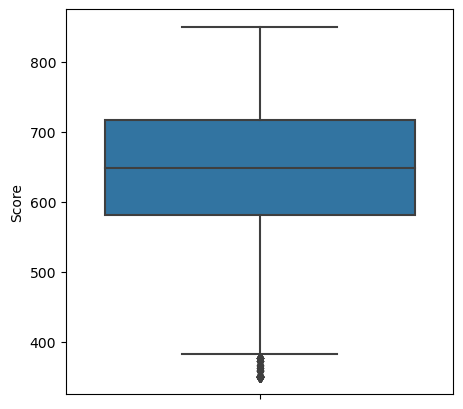

In [81]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=class1_0,y="Score")

In [82]:
num_cols = ['Score', 'Age']
for i in num_cols:
  print(x_train[i].skew())
  print("--------------------")

-0.0672022196752689
--------------------
1.0747866264981876
--------------------


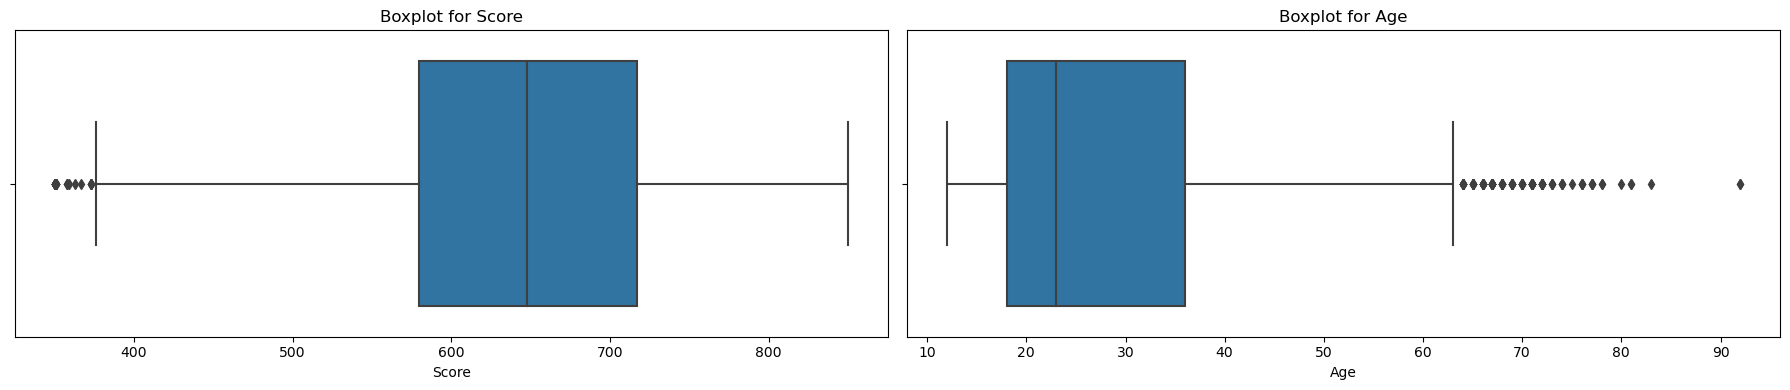

In [83]:
num_cols = ['Score', 'Age']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(x=x_tr[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

In [84]:
import numpy as np

num_cols = ['Score', 'Age']

for i in num_cols:
    std_deviation = np.std(x_tr[i])
    print("Standard Deviation of", i, ":", std_deviation)

Standard Deviation of Score : 98.58984620028525
Standard Deviation of Age : 12.85512401329622


<Axes: xlabel='Score', ylabel='Density'>

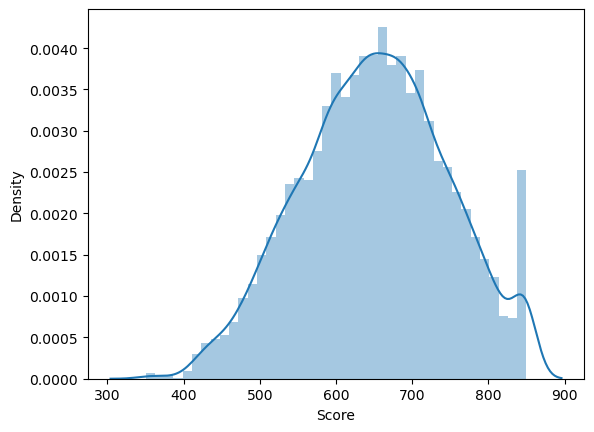

In [85]:
sns.distplot(stud.Score)

<Axes: >

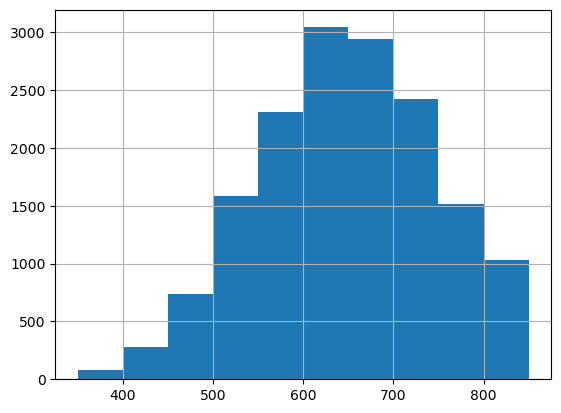

In [86]:
class1_0.Score.hist()

In [87]:
ub1=class1_0.Score.mean()+3*class1_0.Score.std()
lb1=class1_0.Score.mean()-3*class1_0.Score.std()
print(ub1,lb1)

942.4670233335407 353.3220871921148


In [88]:
class1_0.loc[class1_0["Score"]<355.04,"Score"]=355.04

<Axes: xlabel='Score', ylabel='Density'>

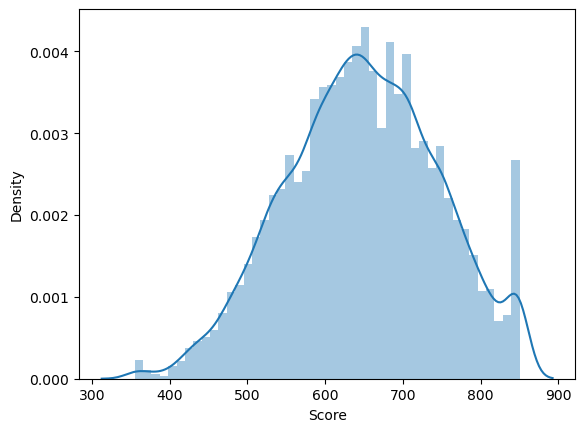

In [89]:
sns.distplot(class1_0.Score) 

<Axes: >

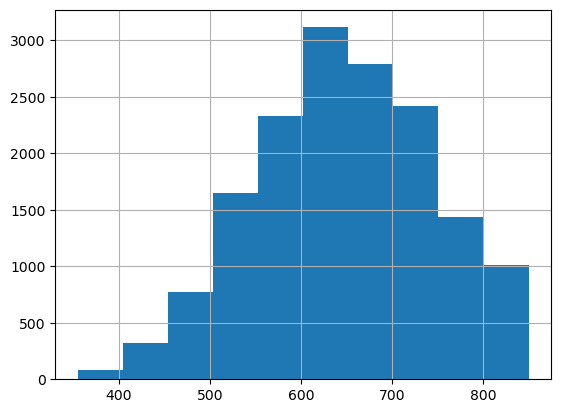

In [90]:
class1_0.Score.hist()

<Axes: ylabel='Age'>

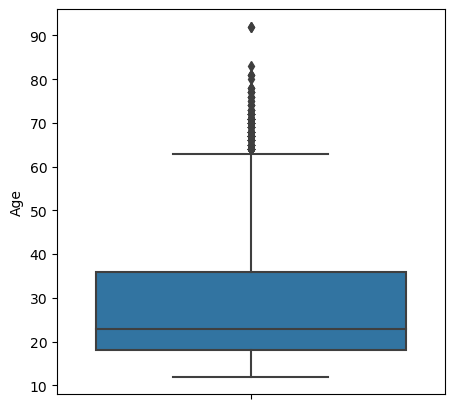

In [91]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=class1_0,y="Age")

<Axes: xlabel='Age', ylabel='Density'>

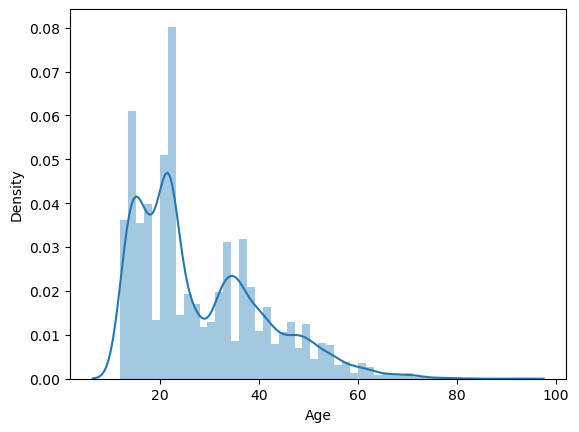

In [92]:
sns.distplot(class1_0.Age) 

<Axes: >

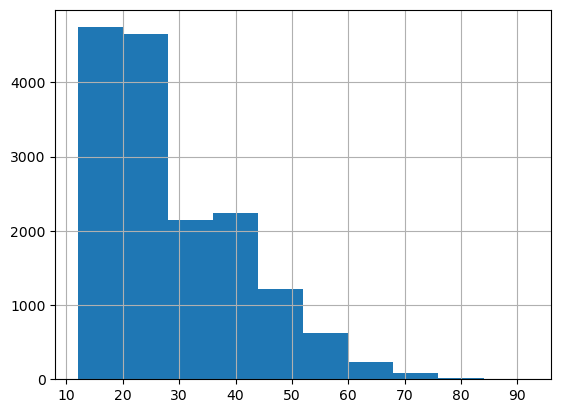

In [93]:
class1_0.Age.hist()

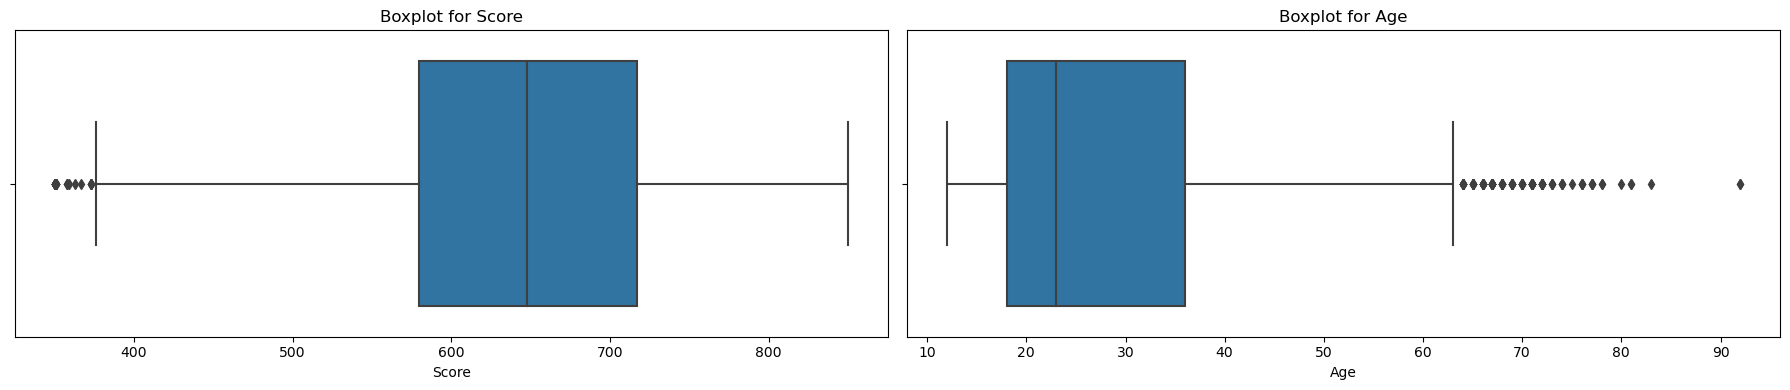

In [94]:
num_cols = ['Score', 'Age']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(x=x_tr[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

In [95]:
class1_0.skew()

Score              -0.098838
Country             0.442409
Gender             -0.016562
Age                 0.938367
Year                0.036161
Credit             -0.226322
NumOf Holiday       1.285487
Id Card            -0.887549
Active Student      0.156051
Estimated Credit   -0.035782
Computer Student    0.000000
dtype: float64

# Visualization

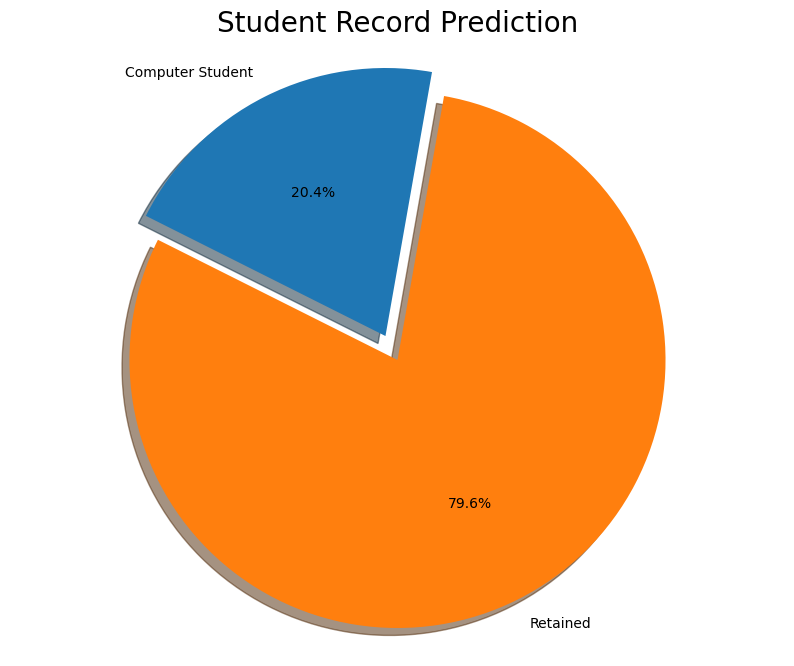

In [96]:
import matplotlib.pyplot as plt

labels = 'Computer Student', 'Retained'
churned_count = stud['Computer Student'][stud['Computer Student'] == 1].count()
retained_count = stud['Computer Student'][stud['Computer Student'] == 0].count()
sizes = [churned_count, retained_count]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=80)
ax1.axis('equal')
plt.title("Student Record Prediction", size=20)
plt.show()


# Skewness

In [97]:
num_cols = ['Score', 'Age']
for i in num_cols:
  print(x_tr[i].skew())
  print("--------------------")

-0.11429653936131527
--------------------
0.945596328372221
--------------------


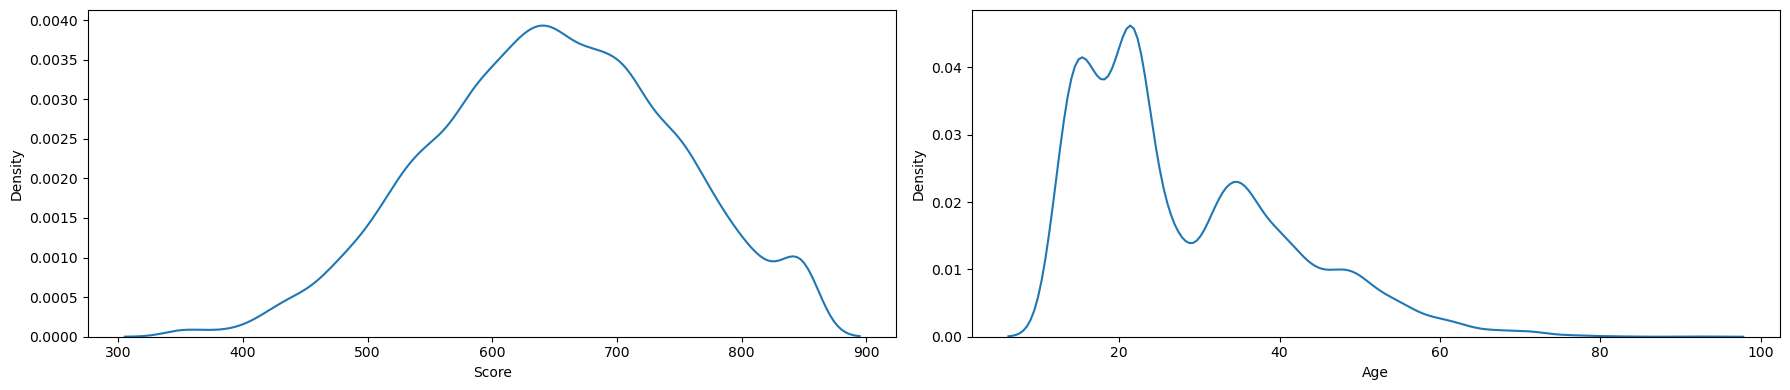

In [98]:
num = ['Score', 'Age']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
j=0
for i in num:
  sns.kdeplot(x_tr[i],ax=axes[j])
  j+=1
plt.tight_layout()
plt.show()

In [99]:
x_tr.skew()

Score              -0.114297
Country             0.426015
Gender             -0.005803
Age                 0.945596
Year                0.037245
Credit             -0.227361
NumOf Holiday       1.284336
Id Card            -0.888483
Active Student      0.164772
Estimated Credit   -0.044061
dtype: float64

# Logistic-Random Oversampling

In [100]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [101]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [102]:
lg_p1=lg.predict(x_te)

In [103]:
lg_cf1=confusion_matrix(y_te,lg_p1)
lg_cf1

array([[765, 836],
       [632, 956]], dtype=int64)

In [104]:
lg_ac1=lg_cf1.diagonal().sum()/lg_cf1.sum()*100
lg_ac1

53.96676074004391

In [105]:
lg_re1=recall_score(y_te,lg_p1)

In [106]:
lg_pr1=precision_score(y_te,lg_p1)

In [107]:
lg_f1=f1_score(y_te,lg_p1,average='weighted')

In [108]:
print("\n",classification_report(y_te,lg_p1)) 
print("\nConfusion Matrix")
print(lg_cf1)


               precision    recall  f1-score   support

           0       0.55      0.48      0.51      1601
           1       0.53      0.60      0.57      1588

    accuracy                           0.54      3189
   macro avg       0.54      0.54      0.54      3189
weighted avg       0.54      0.54      0.54      3189


Confusion Matrix
[[765 836]
 [632 956]]


# DT-Random oversampling


In [109]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [110]:
dt.fit(x_tr,y_tr)


DecisionTreeClassifier()

In [111]:
dt_p1=dt.predict(x_te)

In [112]:
dt_cf1=confusion_matrix(y_te,dt_p1)
dt_cf1

array([[1341,  260],
       [  48, 1540]], dtype=int64)

In [113]:
dt_ac1=dt_cf1.diagonal().sum()/dt_cf1.sum()*100
dt_ac1

90.34179993728442

In [114]:
dt_re1=recall_score(y_te,dt_p1)

In [115]:
dt_pr1=precision_score(y_te,dt_p1)

In [116]:
dt_f1=f1_score(y_te,dt_p1,average="weighted")

In [117]:
print("\n",classification_report(y_te,dt_p1))
print("\nConfusion Matrix")
print(dt_cf1)


               precision    recall  f1-score   support

           0       0.97      0.84      0.90      1601
           1       0.86      0.97      0.91      1588

    accuracy                           0.90      3189
   macro avg       0.91      0.90      0.90      3189
weighted avg       0.91      0.90      0.90      3189


Confusion Matrix
[[1341  260]
 [  48 1540]]


# RF-Random oversampling

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()

In [119]:
rf1.fit(x_tr,y_tr)

RandomForestClassifier()

In [120]:
rf_p1=rf1.predict(x_te)

In [121]:
rf_cf1=confusion_matrix(y_te,rf_p1)
rf_cf1

array([[1476,  125],
       [  38, 1550]], dtype=int64)

In [122]:
rf_ac1=rf_cf1.diagonal().sum()/rf_cf1.sum()*100
rf_ac

83.5746380429356

In [123]:
rf_re1=recall_score(y_te,rf_p1)
rf_pr1=precision_score(y_te,rf_p1)
rf_f1=f1_score(y_te,rf_p1,average="weighted")

In [124]:
print("\n",classification_report(y_te,rf_p1))
print("\nConfusion Matrix")
print(rf_cf1)


               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1601
           1       0.93      0.98      0.95      1588

    accuracy                           0.95      3189
   macro avg       0.95      0.95      0.95      3189
weighted avg       0.95      0.95      0.95      3189


Confusion Matrix
[[1476  125]
 [  38 1550]]


# KNN-Random oversampling

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [126]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier()

In [127]:
knn_p1=knn.predict(x_te)

In [128]:
knn_cf1=confusion_matrix(y_te,knn_p1)
knn_cf1

array([[ 916,  685],
       [ 267, 1321]], dtype=int64)

In [129]:
knn_ac1=knn_cf1.diagonal().sum()/knn_cf1.sum()*100
knn_ac1

70.14738162433365

In [130]:
knn_re1=recall_score(y_te,knn_p1)
knn_pr1=precision_score(y_te,knn_p1)
knn_f1=f1_score(y_te,knn_p1,average="weighted")

In [131]:
print("\n",classification_report(y_te,knn_p1)) 
print("\nConfusion Matrix")
print(knn_cf1)


               precision    recall  f1-score   support

           0       0.77      0.57      0.66      1601
           1       0.66      0.83      0.74      1588

    accuracy                           0.70      3189
   macro avg       0.72      0.70      0.70      3189
weighted avg       0.72      0.70      0.70      3189


Confusion Matrix
[[ 916  685]
 [ 267 1321]]


# XGB-Random oversampling

In [132]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [133]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
xgb_p1=xgb.predict(x_te)


In [135]:
xgb_cf1=confusion_matrix(y_te,xgb_p1)
xgb_cf1

array([[1356,  245],
       [ 140, 1448]], dtype=int64)

In [136]:
xgb_ac1=xgb_cf1.diagonal().sum()/xgb_cf1.sum()*100
xgb_ac1

87.92724992160552

In [154]:
xgb_re1=recall_score(y_te,xgb_p1)
xgb_pr1=precision_score(y_te,xgb_p1)
xgb_f1=f1_score(y_te,xgb_p1,average="weighted")

In [155]:
print("\n",classification_report(y_te,xgb_p1)) 
print("\nConfusion Matrix")
print(xgb_cf1)


               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1601
           1       0.86      0.91      0.88      1588

    accuracy                           0.88      3189
   macro avg       0.88      0.88      0.88      3189
weighted avg       0.88      0.88      0.88      3189


Confusion Matrix
[[1356  245]
 [ 140 1448]]


# SVM-Random oversampling

In [139]:
from sklearn.svm import SVC
svm=SVC()

In [140]:
svm.fit(x_tr,y_tr)

SVC()

In [141]:
svm_p1=svm.predict(x_te)

In [142]:
svm_cf1=confusion_matrix(y_te,svm_p1)
svm_cf1

array([[ 620,  981],
       [ 457, 1131]], dtype=int64)

In [143]:
svm_ac1=svm_cf1.diagonal().sum()/svm_cf1.sum()*100
svm_ac1

54.90749451238632

In [144]:
svm_re1=recall_score(y_te,svm_p1)
svm_pr1=precision_score(y_te,svm_p1)
svm_f1=f1_score(y_te,svm_p1,average="weighted")


In [145]:
print("\n",classification_report(y_te,svm_p1)) 
print("\nConfusion Matrix")
print(svm_cf1)


               precision    recall  f1-score   support

           0       0.58      0.39      0.46      1601
           1       0.54      0.71      0.61      1588

    accuracy                           0.55      3189
   macro avg       0.56      0.55      0.54      3189
weighted avg       0.56      0.55      0.54      3189


Confusion Matrix
[[ 620  981]
 [ 457 1131]]


# NB-Random oversampling

In [146]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [147]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [148]:
nb_p1=nb.predict(x_te)

In [149]:
nb_cf1=confusion_matrix(y_te,nb_p1)
nb_cf1

array([[874, 727],
       [763, 825]], dtype=int64)

In [150]:
nb_ac1=nb_cf1.diagonal().sum()/nb_cf1.sum()*100
nb_ac1

53.27688930699279

In [151]:
nb_re1=recall_score(y_te,nb_p1)
nb_pr1=precision_score(y_te,nb_p1)
nb_f1=f1_score(y_te,nb_p1,average="weighted")

In [152]:
print("\n",classification_report(y_te,nb_p1)) 
print("\nConfusion Matrix")
print(nb_cf1)


               precision    recall  f1-score   support

           0       0.53      0.55      0.54      1601
           1       0.53      0.52      0.53      1588

    accuracy                           0.53      3189
   macro avg       0.53      0.53      0.53      3189
weighted avg       0.53      0.53      0.53      3189


Confusion Matrix
[[874 727]
 [763 825]]


# Model2 After CI and EDA

In [153]:
algo=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB","SVM","Naive Bayes"]
accuracy1=[lg_ac1,dt_ac1,rf_ac1,knn_ac1,xgb_ac1,svm_ac1,nb_ac1]
precision1=[lg_pr1,dt_pr1,rf_pr1,knn_pr1,xgb_pr1,svm_pr1,nb_pr1]
recall1=[lg_re1,dt_re1,rf_re1,knn_re1,xgb_re1,svm_re1,nb_re1]
f1_score1=[lg_f1,dt_f1,rf_f1,knn_f1,xgb_f1,svm_f1,nb_f1]
model2=pd.DataFrame({"Algorithm":algo,"Accuracy":accuracy1,"Precision":precision1,"Recall":recall1,"f1-score":f1_score1})
model2

,Algorithm,Accuracy,Precision,Recall,f1-score
0,Logistic Regression,53.966761,0.533482,0.602015,0.537898
1,Decision Tree,90.341800,0.855556,0.969773,0.903016
2,Random Forest,94.888680,0.925373,0.976071,0.948854
3,KNN,70.147382,0.658524,0.831864,0.696423
4,XGB,87.927250,0.855286,0.911839,0.879158
5,SVM,54.907495,0.535511,0.712217,0.536889
6,Naive Bayes,53.276889,0.531572,0.519521,0.532688


# IMBLEARN

In [ ]:
# d_x1=stud.iloc[:,0:-1]
# d_y1=stud.iloc[:,-1]

In [ ]:
# d_y1.value_counts()

In [ ]:
# a1=RandomOverSampler(random_state=42)
# x2,y2=a1.fit_resample(d_x1,d_y1)

In [ ]:
# x2.shape,y2.shape

In [ ]:
#y2.value_counts()

In [ ]:
#xtr2,xte2,ytr2,yte2=train_test_split(x2,y2,test_size=0.2,random_state=100)
#xtr2.shape,xte2.shape,ytr2.shape,yte2.shape

In [ ]:
#x2.skew()


In [ ]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=x2,y="CreditScore")

In [ ]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=x2,y="Age")

In [ ]:
# from scipy import stats

# num_cols = ['CreditScore', 'Age']

# # Detect and handle outliers
# for col in num_cols:
#     # Calculate the IQR (Interquartile Range)
#     Q1 = x2[col].quantile(0.25)
#     Q3 = x2[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Identify outliers
#     outliers = x2[(x2[col] < lower_bound) | (x2[col] > upper_bound)]

#     # Replace outliers with appropriate values or remove them
#     if col == 'CreditScore':
#         x2.loc[(x2[col] < lower_bound) | (x2[col] > upper_bound), col] = x2[col].median()
#     elif col == 'Age':
#         # Instead of replacing with median, you can remove outliers in 'Age'
#         x2 = x2[(x2[col] >= lower_bound) & (x2[col] <= upper_bound)]

#     # Measure skewness
#     skewness = stats.skew(x2[col])
#     print(f"Skewness for {col}: {skewness}")

In [ ]:
# fig=plt.figure(figsize=(5,5))
# sns.boxplot(data=x2,y="CreditScore")

In [ ]:
# fig=plt.figure(figsize=(5,5))
# sns.boxplot(data=x2,y="Age")

In [ ]:
# x2.skew()

In [ ]:
# sns.distplot(x2.CreditScore)

In [ ]:
# sns.distplot(x2.Age) 

# Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lg=LogisticRegression()

In [ ]:
#lg.fit(xtr2,ytr2)

In [ ]:
#lg_p3=lg.predict(xte2)

In [ ]:
# lg_cf3=confusion_matrix(yte2,lg_p3)
# lg_cf3

In [ ]:
# lg_ac3=lg_cf3.diagonal().sum()/lg_cf3.sum()*100
# lg_ac3

In [ ]:
# lg_a3=f1_score(yte2,lg_p3)
# lg_b3=precision_score(yte2,lg_p3)
# lg_c3=recall_score(yte2,lg_p3)

In [ ]:
# print("\n",classification_report(yte2,lg_p3))
# print("\nConfusion Matrix")
# print(lg_cf3)

# Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# dt=DecisionTreeClassifier()

In [ ]:
# dt.fit(xtr2,ytr2)

In [ ]:
# dt_cf3=confusion_matrix(yte2,dt_p3)
# dt_cf3

In [ ]:
# dt_ac3=dt_cf3.diagonal().sum()/dt_cf3.sum()*100
# dt_ac3

In [ ]:
# dt_a3=f1_score(yte2,dt_p3)
# dt_b3=precision_score(yte2,dt_p3)
# dt_c3=recall_score(yte2,dt_p3)

In [ ]:
# print(classification_report(yte2,dt_p3))
# print("\nConfusion Matrix")
# print(dt_cf3)

# Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf=RandomForestClassifier()

In [ ]:
# rf.fit(xtr2,ytr2)

In [ ]:
# rf_p3=rf.predict(xte2)

In [ ]:
# rf_cf3=confusion_matrix(yte2,rf_p3)
# rf_cf3

In [ ]:
# rf_ac3=rf_cf3.diagonal().sum()/rf_cf3.sum()*100
# rf_ac3

In [ ]:
# rf_a3=f1_score(yte2,rf_p3)
# rf_b3=precision_score(yte2,rf_p3)
# rf_c3=recall_score(yte2,rf_p3)

In [ ]:
# print(classification_report(yte2,rf_p3))
# print("\nConfusion Matrix")
# print(rf_cf3)

# KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier()

In [ ]:
# knn.fit(xtr2,ytr2)

In [ ]:
# knn_p3=knn.predict(xte2)

In [ ]:
# knn_cf3=confusion_matrix(yte2,knn_p3)
# knn_cf3

In [ ]:
# knn_ac3=knn_cf3.diagonal().sum()/knn_cf3.sum()*100
# knn_ac3

In [ ]:
# knn_a3=f1_score(yte2,knn_p3)
# knn_b3=precision_score(yte2,knn_p3)
# knn_c3=recall_score(yte2,knn_p3)

In [ ]:
# print(classification_report(yte2,knn_p3))
# print("\nConfusion Matrix")
# print(knn_cf3)


# XGB

In [ ]:
# import xgboost
# from xgboost import XGBClassifier
# xgb=XGBClassifier()

In [ ]:
# xgb.fit(xtr2,ytr2)

In [ ]:
# xgb_p3=xgb.predict(xte2)

In [ ]:
# xgb_cf3=confusion_matrix(yte2,xgb_p3)
# xgb_cf3

In [ ]:
# xgb_ac3=xgb_cf3.diagonal().sum()/xgb_cf3.sum()*100
# xgb_ac3

In [ ]:
# xgb_a3=f1_score(yte2,xgb_p3)
# xgb_b3=precision_score(yte2,xgb_p3)
# xgb_c3=recall_score(yte2,xgb_p3)

In [ ]:
# print(classification_report(yte2,xgb_p3))
# print("\nConfusion Matrix")
# print(xgb_cf3)

# SVM

In [ ]:
# from sklearn.svm import SVC
# svm=SVC()

In [ ]:
# svm.fit(xtr2,ytr2)

In [ ]:
# svm_p3=svm.predict(xte2)

In [ ]:
# svm_cf3=confusion_matrix(yte2,svm_p3)
# svm_cf3

In [ ]:
# svm_ac3=svm_cf3.diagonal().sum()/svm_cf3.sum()*100
# svm_ac3

In [ ]:
# svm_a3=f1_score(yte2,svm_p3)
# svm_b3=precision_score(yte2,svm_p3)
# svm_c3=recall_score(yte2,svm_p3)

In [ ]:
# print(classification_report(yte2,svm_p3))
# print("\nConfusion Matrix")
# print(svm_cf3)

# Naive Bayes

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# nb=MultinomialNB()

In [ ]:
# nb.fit(xtr2,ytr2)

In [ ]:
# nb_p3=nb.predict(xte2)

In [ ]:
# nb_cf3=confusion_matrix(yte2,nb_p3)
# nb_cf3

In [ ]:
# nb_ac3=nb_cf3.diagonal().sum()/nb_cf3.sum()*100
# nb_ac3

In [ ]:
# nb_a3=f1_score(yte2,nb_p3)
# nb_b3=precision_score(yte2,nb_p3)
# nb_c3=recall_score(yte2,nb_p3)

In [ ]:
# print(classification_report(yte2,nb_p3))
# print("\nConfusion Matrix")
# print(nb_cf3)

In [ ]:
# algo=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB","SVM","Naive Bayes"]
# accuracy=[lg_ac3,dt_ac3,rf_ac3,knn_ac3,xgb_ac3,svm_ac3,nb_ac3,]
# f1=[lg_a3,dt_a3,rf_a3,knn_a3,xgb_a3,svm_a3,nb_a3]
# precision=[lg_b3,dt_b3,rf_b3,knn_b3,xgb_b3,svm_b3,nb_b3]
# recall=[lg_c3,dt_c3,rf_c3,knn_c3,xgb_c3,svm_c3,nb_c3]

In [ ]:
# model3=pd.DataFrame({"Algorithm":algo,"Accuracy":accuracy,"F1-score":f1,"Precision":precision,"Recall":recall})
# model3

# Model Results

In [ ]:
from tabulate import tabulate

print("BASIC MODEL RESULTS:")
print(tabulate(model1, headers="keys", tablefmt="psql"))

print("\nMODEL 2 (RANDOM OVERSAMPLING) RESULTS:")
print(tabulate(model2, headers="keys", tablefmt="psql"))

# print("\nMODEL 3 (IMBLEARN Oversampling) RESULTS:")
# print(tabulate(model3, headers="keys", tablefmt="psql"))

# Feature Selection

# RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rfe=RFE(rf1,n_features_to_select=5)

In [ ]:
rfe.fit(class1_0.iloc[:,:-1],class1_0.iloc[:,-1])

In [ ]:
rfe.support_

In [ ]:
f1=pd.DataFrame({'feature':list(rfe.support_),'col':list(class1_0.iloc[:,:-1].columns)})
f1

In [ ]:
class1_0.columns

In [ ]:
# List of columns to drop
df=class1_0.drop(['Country', 'Gender', 'NumOf Holiday', 'Id Card', 'Active Student'],axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
n_x=df.iloc[:,:-1]
n_y=df.iloc[:,-1]

In [ ]:
xtr,xte,ytr,yte=train_test_split(n_x,n_y,test_size=0.2,random_state=101)
xtr.shape,xte.shape,ytr.shape,yte.shape

In [ ]:
# Logistic-FS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report
print(lg)
lg.fit(xtr,ytr)
lg_f=lg.predict(xte)
fcf1=confusion_matrix(yte,lg_f)
fac1=fcf1.diagonal().sum()/fcf1.sum()*100
fre1=recall_score(yte,lg_f)
fpr1=precision_score(yte,lg_f)
ff1=f1_score(yte,lg_f,average='weighted')
print("\n",classification_report(yte,lg_f)) 
print("\nConfusion Matrix")
print(fcf1)

In [ ]:
print(dt)
dt.fit(xtr,ytr)
dt_f=dt.predict(xte)
fcf2=confusion_matrix(yte,dt_f)
fac2=fcf2.diagonal().sum()/fcf2.sum()*100
fre2=recall_score(yte,dt_f)
fpr2=precision_score(yte,dt_f)
ff2=f1_score(yte,dt_f,average='weighted')
print("\n",classification_report(yte,dt_f)) 
print("\nConfusion Matrix")
print(fcf2)

In [ ]:
print(rf)
rf.fit(xtr,ytr)
rf_f=rf.predict(xte)
fcf3=confusion_matrix(yte,rf_f)
fac3=fcf3.diagonal().sum()/fcf3.sum()*100
fre3=recall_score(yte,rf_f)
fpr3=precision_score(yte,rf_f)
ff3=f1_score(yte,rf_f,average='weighted')
print("\n",classification_report(yte,rf_f)) 
print("\nConfusion Matrix")
print(fcf3)

In [ ]:
print(knn)
knn.fit(xtr,ytr)
knn_f=knn.predict(xte)
fcf4=confusion_matrix(yte,knn_f)
fac4=fcf4.diagonal().sum()/fcf4.sum()*100
fre4=recall_score(yte,knn_f)
fpr4=precision_score(yte,knn_f)
ff4=f1_score(yte,knn_f,average='weighted')
print("\n",classification_report(yte,knn_f)) 
print("\nConfusion Matrix")
print(fcf4)

In [ ]:
print(xgb)
xgb.fit(xtr,ytr)
xgb_f=xgb.predict(xte)
fcf5=confusion_matrix(yte,knn_f)
fac5=fcf5.diagonal().sum()/fcf5.sum()*100
fre5=recall_score(yte,xgb_f)
fpr5=precision_score(yte,xgb_f)
ff5=f1_score(yte,xgb_f,average='weighted')
print("\n",classification_report(yte,xgb_f)) 
print("\nConfusion Matrix")
print(fcf5)

In [ ]:
from sklearn.svm import SVC
svm=SVC()
print(svm)
svm.fit(xtr,ytr)
svm_f=svm.predict(xte)
fcf6=confusion_matrix(yte,svm_f)
fac6=fcf6.diagonal().sum()/fcf6.sum()*100
fre6=recall_score(yte,svm_f)
fpr6=precision_score(yte,svm_f)
ff6=f1_score(yte,svm_f,average='weighted')
print("\n",classification_report(yte,svm_f)) 
print("\nConfusion Matrix")
print(fcf6)

In [ ]:
print(nb)
nb.fit(xtr,ytr)
nb_f=nb.predict(xte)
fcf7=confusion_matrix(yte,nb_f)
fac7=fcf7.diagonal().sum()/fcf7.sum()*100
fre7=recall_score(yte,nb_f)
fpr7=precision_score(yte,nb_f)
ff7=f1_score(yte,nb_f,average='weighted')
print("\n",classification_report(yte,nb_f)) 
print("\nConfusion Matrix")
print(fcf7)

In [ ]:
algo=['Logistic','Decision Tree','Random Forest','KNN','xgb','SVM','NB']
accuracy3=[fac1,fac2,fac3,fac4,fac5,fac6,fac7]
precision3=[fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7]
recall3=[fre1,fre2,fre3,fre4,fre5,fre6,fre7]
f1_score3=[ff1,ff2,ff3,ff4,ff5,ff6,ff7]
model4=pd.DataFrame({"Model":algo,"Accuracy":accuracy3,"Precision":precision3,"Recall":recall3,"f1-score":f1_score3})
model4

In [ ]:
#Confusion matrix for Decision Tree model because the performance of model is good as compare to other model
cm=confusion_matrix(yte,rf_f)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc

clf = RandomForestClassifier()

# Train the classifier
clf.fit(xtr,ytr)

# Predict probabilities for the positive class (class 1)
rf_f = clf.predict_proba(xte)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(yte,rf_f)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()